### Exercise 4

Simulate and analyze AR, MA, ARMA, ARIMA, SARIMA models<br>
• Generate time series data then compute ACF and PACF.<br>
• Determine model orders.<br>
• Compare empiric ACF and PACF with theoretical counterpart.<br>
• Estimate the model parameters from the generated data.<br>

In [10]:
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf, pacf

from utils import (
    time_plot,
    plot_arma_process,
    stationarity_tests,
    get_figure,
    acf_plot,
    pacf_plot,
)


#### AR Model

AR(1) $x_t = 0.4 x_{t-1} + w_t$
AR(1) AR roots: [2.5]
AR(1) is stationary: True
AR(2) $x_t = 1.1 x_{t-1} - 0.4 x_{t-2} + w_t$
AR(2) AR roots: [1.375-0.78062475j 1.375+0.78062475j]
AR(2) is stationary: True
AR(3) $x_t = 0.8 x_{t-1} + 0.1 x_{t-2} - 0.15 x_{t-3} + w_t$
AR(3) AR roots: [-2.51236318+0.j          1.58951492-0.35635164j  1.58951492+0.35635164j]
AR(3) is stationary: True


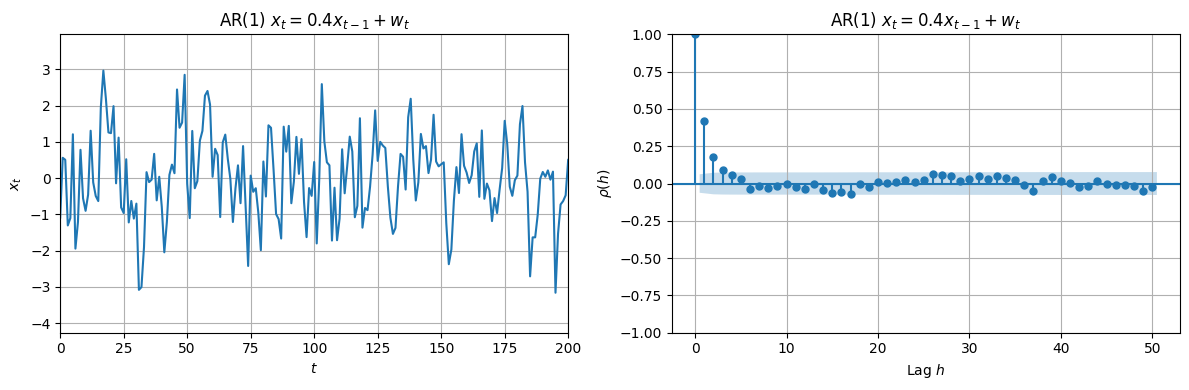

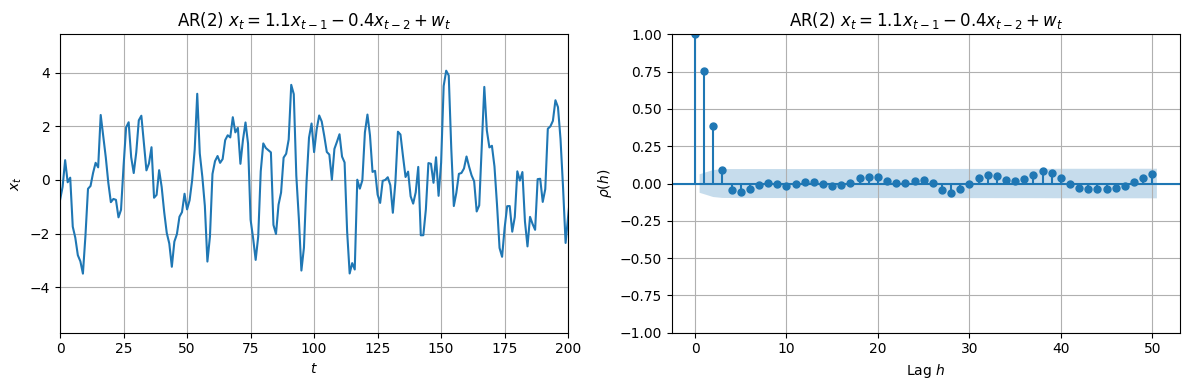

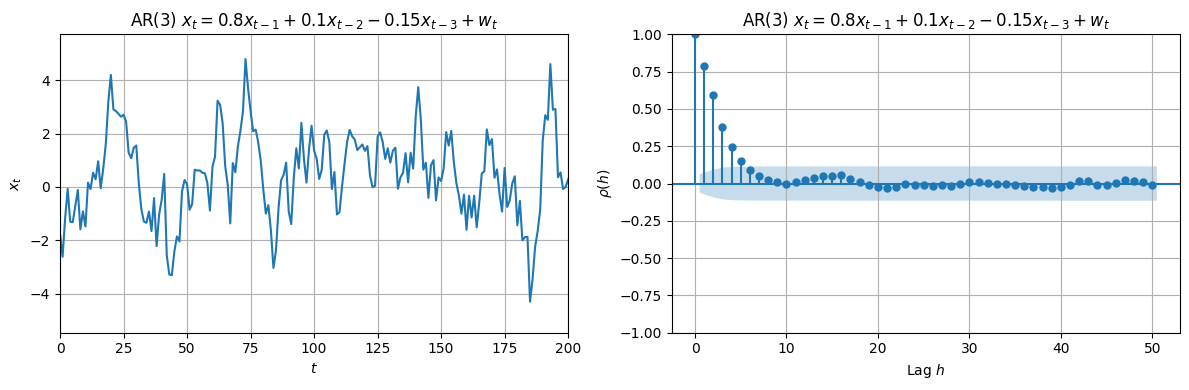

In [15]:
np.random.seed(123)

# AR characteristic polynomials
ar_parameters = [
    ([1, -0.4],              r'$x_t = 0.4 x_{t-1} + w_t$'),
    ([1, -1.1, 0.4],         r'$x_t = 1.1 x_{t-1} - 0.4 x_{t-2} + w_t$'),
    ([1, -0.8, -0.1, 0.15],  r'$x_t = 0.8 x_{t-1} + 0.1 x_{t-2} - 0.15 x_{t-3} + w_t$'),
]

# Time series + ACF
np.random.seed(123)
for ar_coeffs, formula in ar_parameters:
    plot_arma_process(ar_coeffs, [1], formula, acf_or_pacf=True)


AR(1) $x_t = -\frac{1}{7}x_{t-1}+w_t$
AR(1) AR roots: [-7.]
AR(1) is stationary: True
AR(2) $x_t = \frac{3}{2}x_{t-1}-\frac{1}{2}x_{t-2}+w_t$
AR(2) AR roots: [1. 2.]
AR(2) is stationary: False
AR(3) $x_t = \frac{5}{6}x_{t-1}+\frac{1}{6}x_{t-2}-\frac{1}{6}x_{t-3}+w_t$
AR(3) AR roots: [-2.30277564  1.30277564  2.        ]
AR(3) is stationary: True
AR(4) $x_t = \frac{5}{4}x_{t-2}-\frac{1}{4}x_{t-4}+w_t$
AR(4) AR roots: [-2. -1.  1.  2.]
AR(4) is stationary: False


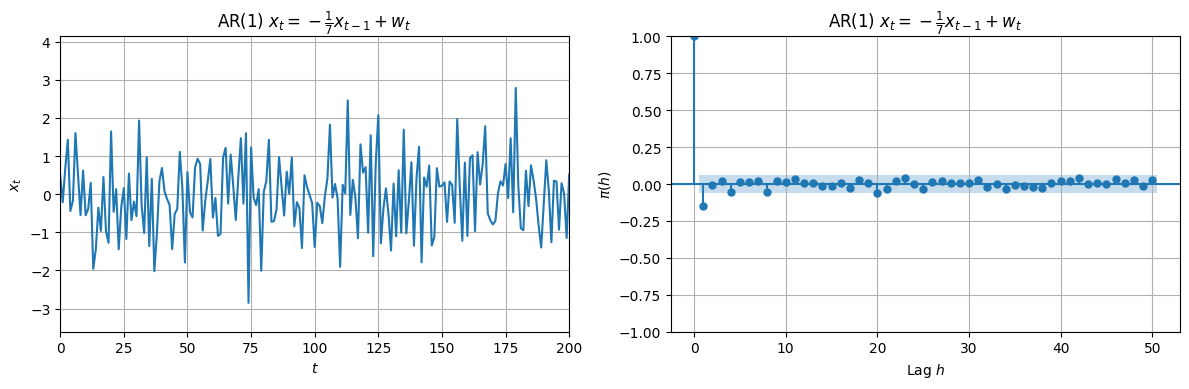

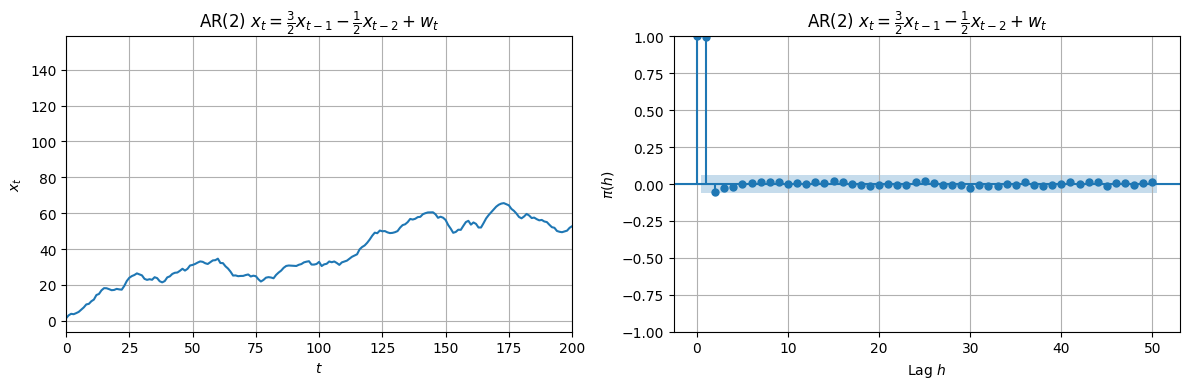

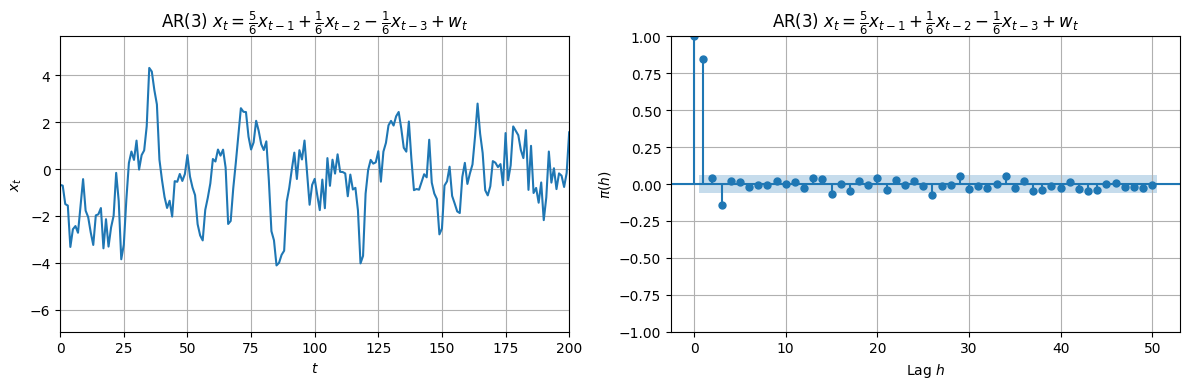

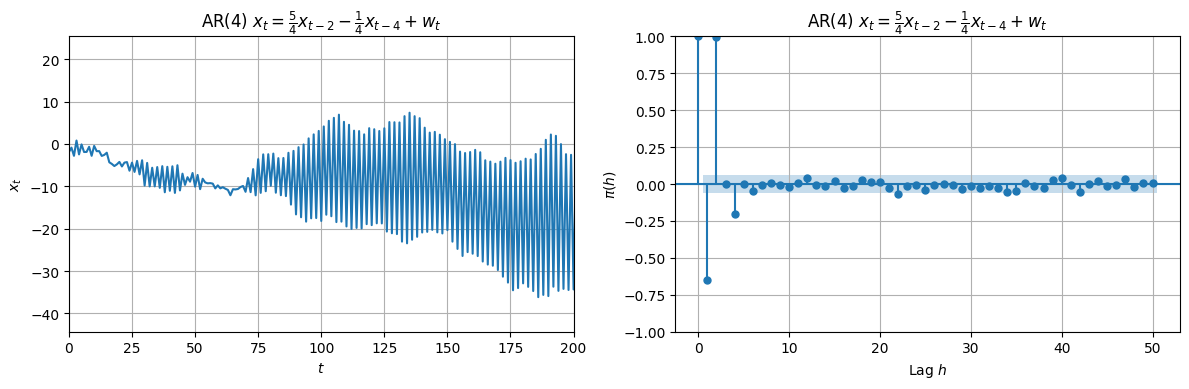

In [12]:
np.random.seed(42)
for ar_coeffs, formula in ar_parameters:
    plot_arma_process(ar_coeffs, [1], formula, acf_or_pacf=False)


In [13]:
# parameter estimation
model = sm.tsa.ARIMA(y, order=(2, 0, 0))
res = model.fit()
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -714.919
Date:                Sat, 06 Dec 2025   AIC                           1437.837
Time:                        16:57:00   BIC                           1454.696
Sample:                             0   HQIC                          1444.453
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0525      0.068      0.771      0.441      -0.081       0.186
ar.L1          0.5945      0.044     13.561      0.000       0.509       0.680
ar.L2         -0.2609      0.045     -5.808      0.0

#### MA Model

MA(1) $x_t = w_t + 0.6 w_{t-1}$
MA(1) MA roots: [-1.66666667]
MA(1) is invertible: True
MA(2) $x_t = w_t - 0.5 w_{t-1} + 0.25 w_{t-2}$
MA(2) MA roots: [1.-1.73205081j 1.+1.73205081j]
MA(2) is invertible: True
MA(3) $x_t = w_t + 0.4 w_{t-1} - 0.2 w_{t-2} + 0.1 w_{t-3}$
MA(3) MA roots: [-1.2442785 +0.j          1.62213925-2.32496242j  1.62213925+2.32496242j]
MA(3) is invertible: True


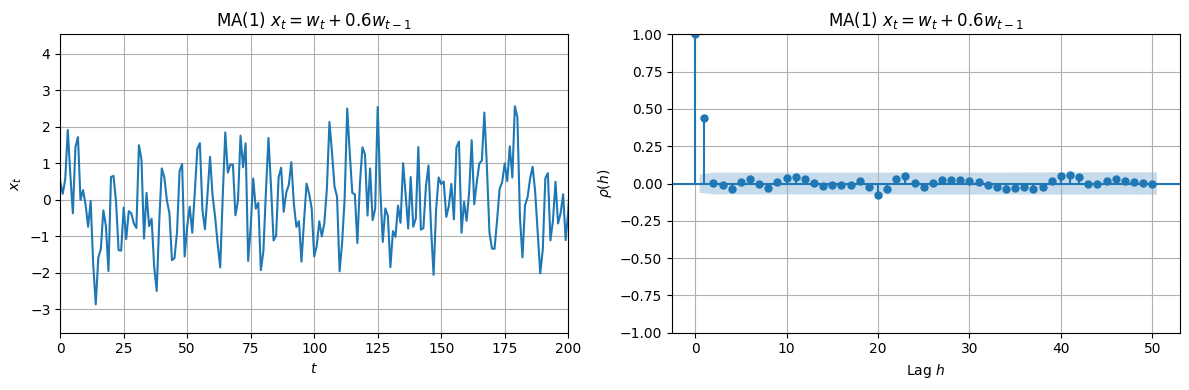

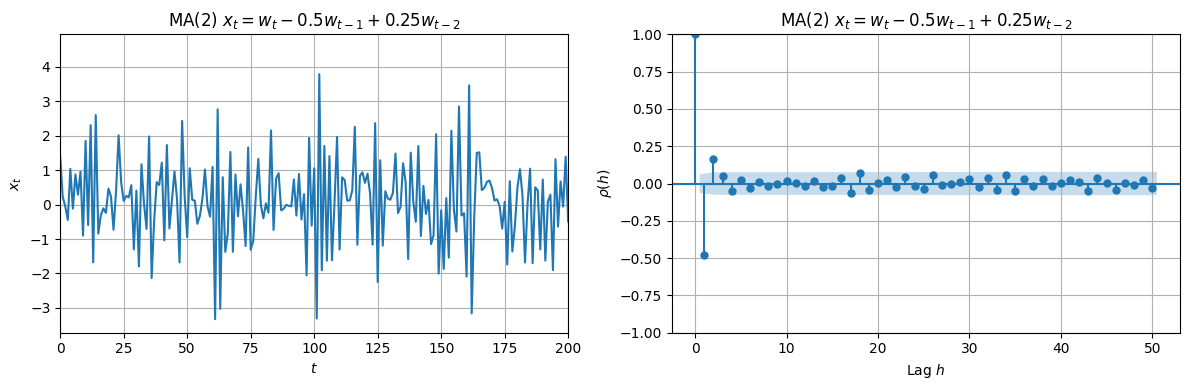

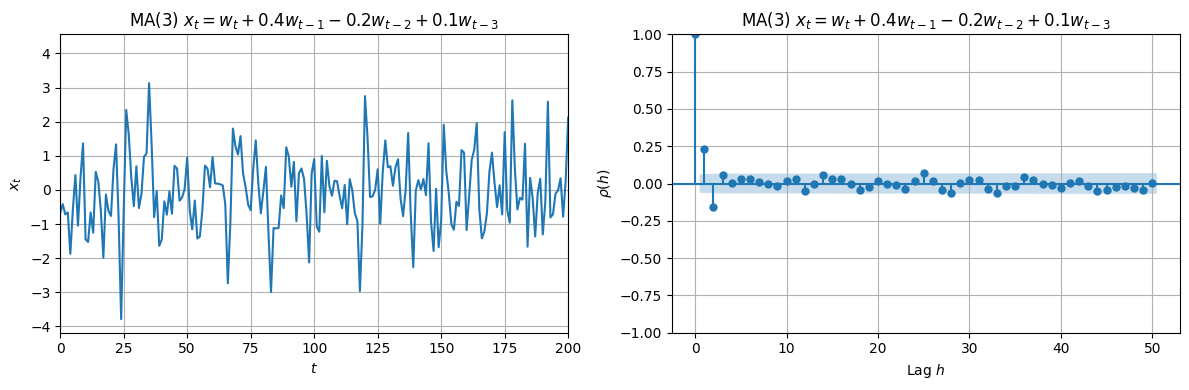

In [16]:
np.random.seed(42)

ma_parameters = [
    ([1, 0.6],                    r'$x_t = w_t + 0.6 w_{t-1}$'),
    ([1, -0.5, 0.25],              r'$x_t = w_t - 0.5 w_{t-1} + 0.25 w_{t-2}$'),
    ([1, 0.4, -0.2, 0.1],          r'$x_t = w_t + 0.4 w_{t-1} - 0.2 w_{t-2} + 0.1 w_{t-3}$'),
]

for ma_coeffs, formula in ma_parameters:
    plot_arma_process([1], ma_coeffs, formula, acf_or_pacf=True)


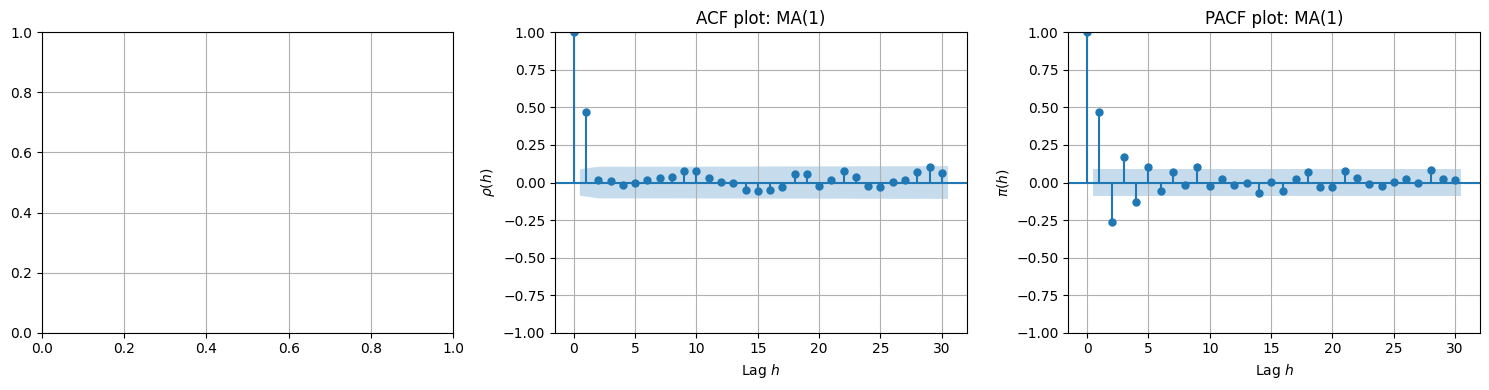

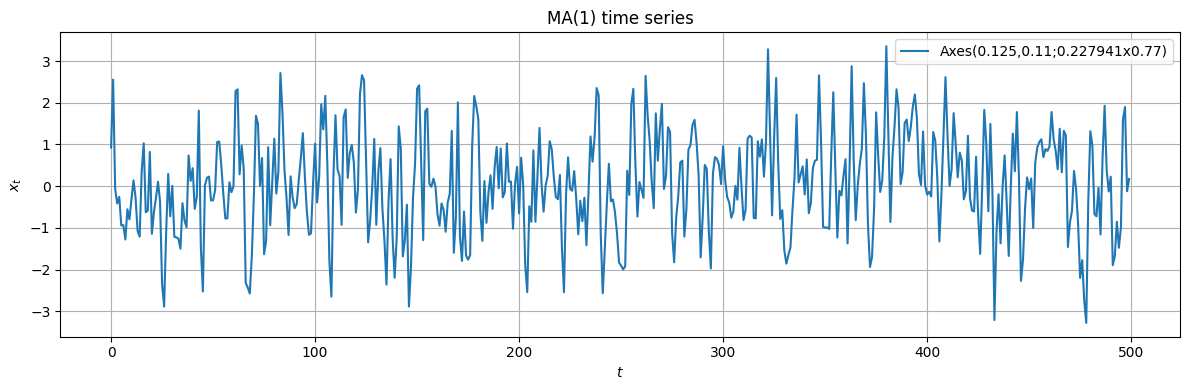

In [7]:
np.random.seed(42)
for ma_coeffs, formula in ma_parameters:
    plot_arma_process([1], ma_coeffs, formula, acf_or_pacf=False)


#### ARMA Model

ARMA(2,1) $x_t = 0.6 x_{t-1} - 0.2 x_{t-2} + w_t + 0.5 w_{t-1}$
ARMA(2,1) AR roots: [1.5-1.6583124j 1.5+1.6583124j]
ARMA(2,1) is stationary: True
ARMA(2,1) MA roots: [-2.]
ARMA(2,1) is invertible: True
ARMA(2,1) $x_t = 0.6 x_{t-1} - 0.2 x_{t-2} + w_t + 0.5 w_{t-1}$
ARMA(2,1) AR roots: [1.5-1.6583124j 1.5+1.6583124j]
ARMA(2,1) is stationary: True
ARMA(2,1) MA roots: [-2.]
ARMA(2,1) is invertible: True


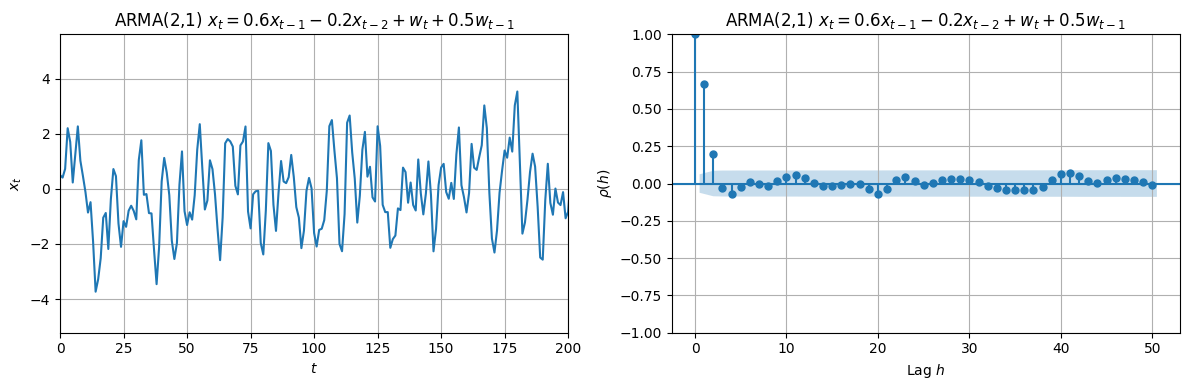

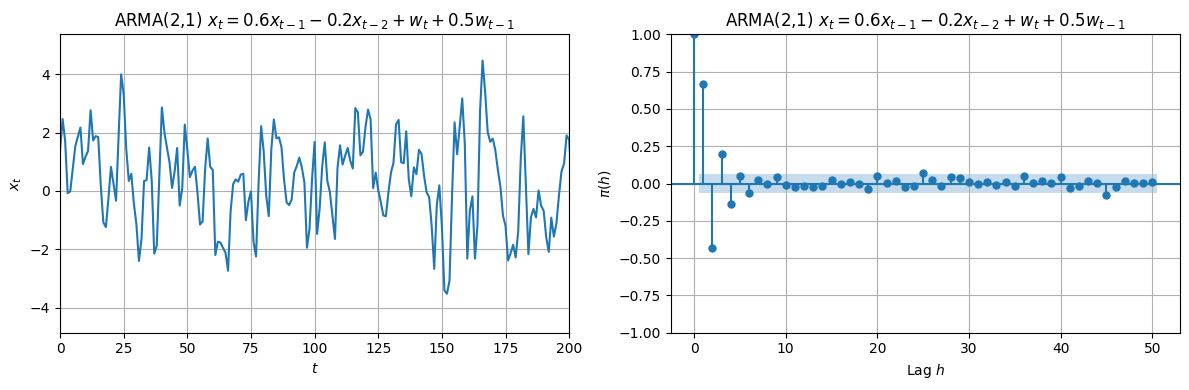

In [17]:
np.random.seed(42)

# ARMA(2,1)
ar_coeffs = [1, -0.6, 0.2]
ma_coeffs = [1, 0.5]

arma_formula = r'$x_t = 0.6 x_{t-1} - 0.2 x_{t-2} + w_t + 0.5 w_{t-1}$'

plot_arma_process(ar_coeffs, ma_coeffs, arma_formula, acf_or_pacf=True)
plot_arma_process(ar_coeffs, ma_coeffs, arma_formula, acf_or_pacf=False)


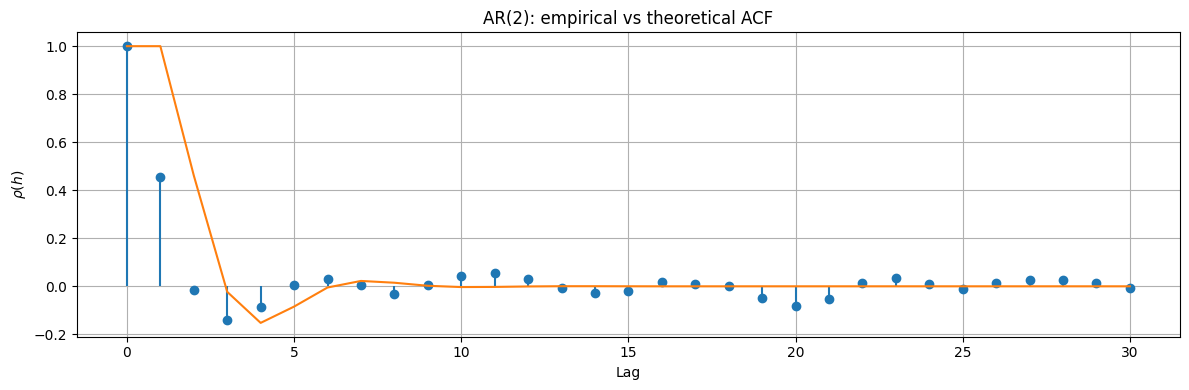

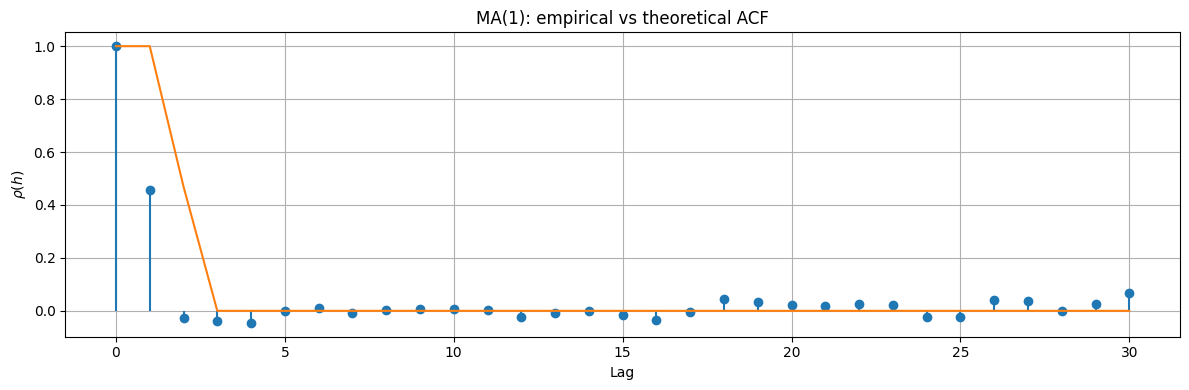

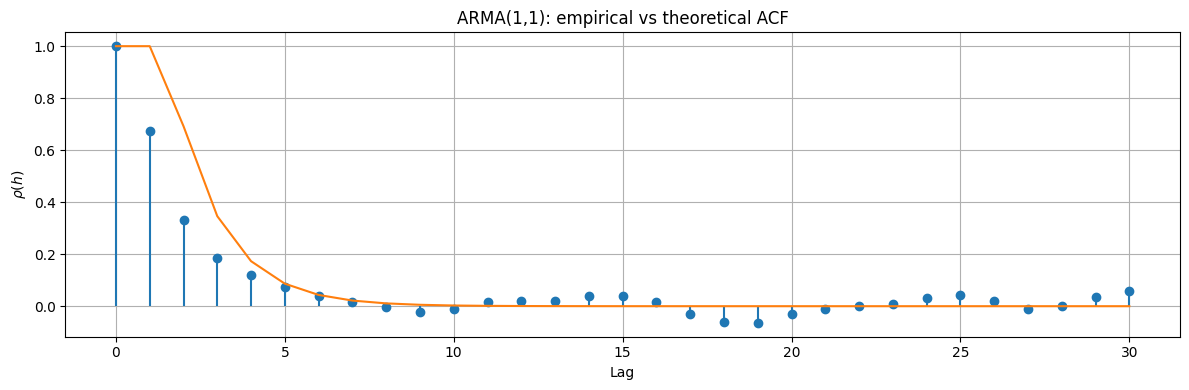

In [21]:
np.random.seed(42)
nsamples = 1000
nlags = 30

def compare_acf(ar_coeffs, ma_coeffs, title, nsamples=1200, nlags=30):
    model = ArmaProcess(ar=ar_coeffs, ma=ma_coeffs)
    y = model.generate_sample(nsample=nsamples)

    # empirical ACF: length = nlags + 1 (lags 0..nlags)
    rho_emp = acf(y, nlags=nlags)

    # theoretical ACF from ArmaProcess: length = nlags (lags 1..nlags)
    rho_th_no0 = model.acf(lags=nlags)
    # add lag 0 = 1.0 at the front so lengths match
    rho_th = np.r_[1.0, rho_th_no0]

    fig, axs = get_figure()
    ax = axs[0]
    lags = np.arange(nlags + 1)

    ax.stem(lags, rho_emp, markerfmt="o", basefmt=" ")
    ax.plot(lags, rho_th, linestyle="-")
    ax.set_title(f"{title}: empirical vs theoretical ACF")
    ax.set_xlabel("Lag")
    ax.set_ylabel(r"$\rho(h)$")
    fig.tight_layout()


# AR(2)
compare_acf([1, -0.6, 0.3], [1], "AR(2)")

# MA(1)
compare_acf([1], [1, 0.7], "MA(1)")

# ARMA(1,1)
compare_acf([1, -0.5], [1, 0.4], "ARMA(1,1)")


In [25]:
np.random.seed(42)
nsamples = 1000

def simulate_and_estimate(ar_coeffs, ma_coeffs, order, label):
    model = ArmaProcess(ar=ar_coeffs, ma=ma_coeffs)
    y = model.generate_sample(nsample=nsamples)

    print(f"\n=== {label} ===")
    # stationarity check
    stationarity_tests(y)

    # fit ARIMA with given order (p,d,q)
    fitted_model = ARIMA(y, order=order).fit()
    print(fitted_model.summary())

# AR(2): x_t = 0.6 x_{t-1} - 0.3 x_{t-2} + w_t
simulate_and_estimate([1, -0.6, 0.3], [1], order=(2, 0, 0), label="AR(2)")

# MA(1): x_t = w_t + 0.7 w_{t-1}
simulate_and_estimate([1], [1, 0.7], order=(0, 0, 1), label="MA(1)")

# ARMA(1,1): x_t = 0.5 x_{t-1} + w_t + 0.4 w_{t-1}
simulate_and_estimate([1, -0.5], [1, 0.4], order=(1, 0, 1), label="ARMA(1,1)")



=== AR(2) ===
Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.3025)
	- ZA: Stationary (p-value: 0.0000)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1397.599
Date:                Sat, 06 Dec 2025   AIC                           2803.197
Time:                        18:20:36   BIC                           2822.828
Sample:                             0   HQIC                          2810.658
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0277

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1397.012
Date:                Sat, 06 Dec 2025   AIC                           2800.024
Time:                        18:36:03   BIC                           2814.744
Sample:                             0   HQIC                          2805.619
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5939      0.035     17.061      0.000       0.526       0.662
ma.L1          0.3003      0.041      7.347      0.000       0.220       0.380
sigma2         0.9589      0.042     22.640      0.0

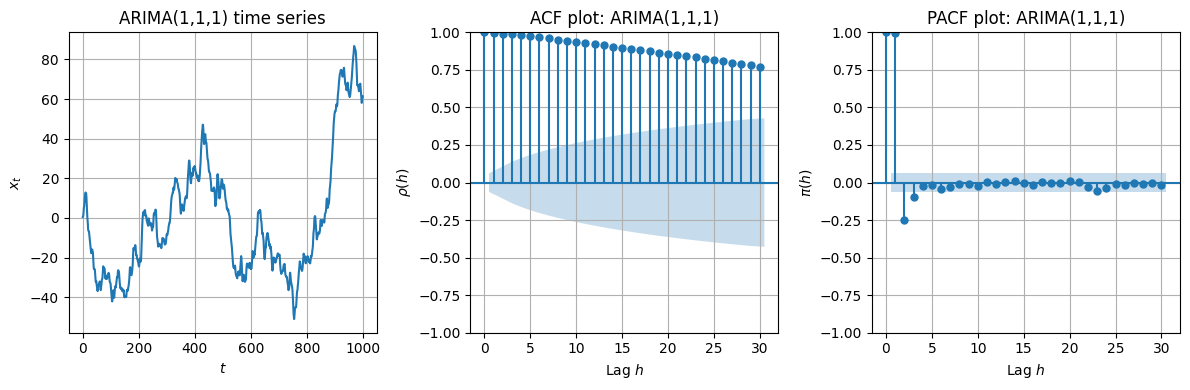

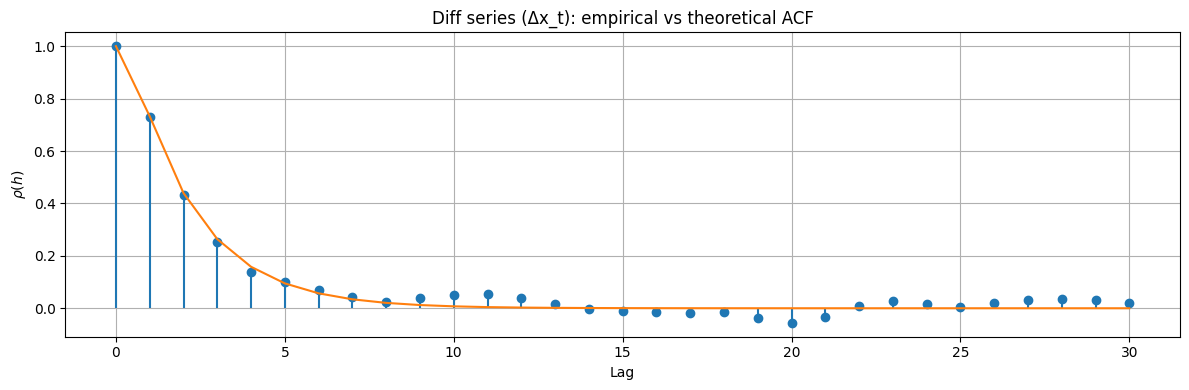

In [28]:

np.random.seed(42)
nsamples = 1000

# (1 - 0.6 L) (1 - L) x_t = (1 + 0.3 L) w_t
phi = 0.6
theta = 0.3

# simulate ARMA(1,1) for the differenced series Δx_t
ar_diff = [1, -phi]     # 1 - phi L
ma_diff = [1, theta]    # 1 + theta L
arma_diff = ArmaProcess(ar=ar_diff, ma=ma_diff)

w = arma_diff.generate_sample(nsample=nsamples)   # Δx_t

# build ARIMA(1,1,1) series by integrating once
x = np.cumsum(w)


fig, axs = get_figure(ncols=3)

time_plot(
    x=np.arange(nsamples),
    y=x,
    title="ARIMA(1,1,1) time series",
    ax=axs[0],
)

acf_plot(x, 30, axs[1], title="ARIMA(1,1,1)")
pacf_plot(x, 30, axs[2], title="ARIMA(1,1,1)")

fig.tight_layout()

nlags = 30

# empirical ACF of Δx_t
rho_emp = acf(np.diff(x), nlags=nlags)      # typically length nlags+1

# theoretical ACF from ARMA model
rho_th_raw = arma_diff.acf(lags=nlags + 5)

# make both same length
m = min(len(rho_emp), len(rho_th_raw))
rho_emp = rho_emp[:m]
rho_th = rho_th_raw[:m]
lags = np.arange(m)

fig2, axs2 = get_figure()
ax2 = axs2[0]

ax2.stem(lags, rho_emp, markerfmt="o", basefmt=" ")
ax2.plot(lags, rho_th, linestyle="-")
ax2.set_title("Diff series (Δx_t): empirical vs theoretical ACF")
ax2.set_xlabel("Lag")
ax2.set_ylabel(r"$\rho(h)$")
fig2.tight_layout()


model_arima = ARIMA(x, order=(1, 1, 1))
res_arima = model_arima.fit()
print(res_arima.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  600
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -834.173
Date:                            Sat, 06 Dec 2025   AIC                           1674.345
Time:                                    20:08:52   BIC                           1687.476
Sample:                                         0   HQIC                          1679.461
                                            - 600                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5378      0.034     15.733      0.000       0.471       0.605
ar.S.L12       0.4245      0.038   

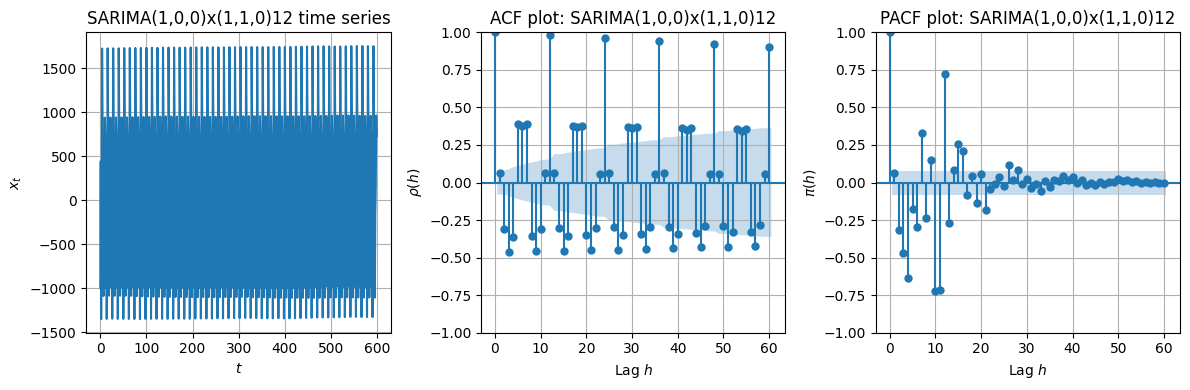

In [30]:
np.random.seed(42)

n = 600  # e.g. 50 years of monthly data
phi = 0.5   # non-seasonal AR(1)
Phi = 0.4   # seasonal AR(1) at lag 12
sigma2 = 1.0

dummy = np.zeros(n)
sarima_model = SARIMAX(
    dummy,
    order=(1, 0, 0),
    seasonal_order=(1, 1, 0, 12),
)

params = [phi, Phi, sigma2]
y_sarima = sarima_model.simulate(params, n)

# ACF/PACF of SARIMA series
fig, axs = get_figure(ncols=3)
time_plot(
    x=np.arange(n),
    y=y_sarima,
    title="SARIMA(1,0,0)x(1,1,0)12 time series",
    ax=axs[0],
)
acf_plot(y_sarima, 60, axs[1], title="SARIMA(1,0,0)x(1,1,0)12")
pacf_plot(y_sarima, 60, axs[2], title="SARIMA(1,0,0)x(1,1,0)12")
fig.tight_layout()

# estimate SARIMA parameters
sarima_fit = SARIMAX(
    y_sarima,
    order=(1, 0, 0),
    seasonal_order=(1, 1, 0, 12),
).fit(disp=False)
print(sarima_fit.summary())


#### Real world data

In [33]:
from data import get_france_death_rate_20y

data = get_france_death_rate_20y()
data.head()

,month,country,year,value,time
0,jan,FR,2005,49165.0,2005-01-31
1,feb,FR,2005,51122.0,2005-02-28
2,mar,FR,2005,54284.0,2005-03-31
3,apr,FR,2005,44233.0,2005-04-30
4,may,FR,2005,43350.0,2005-05-31


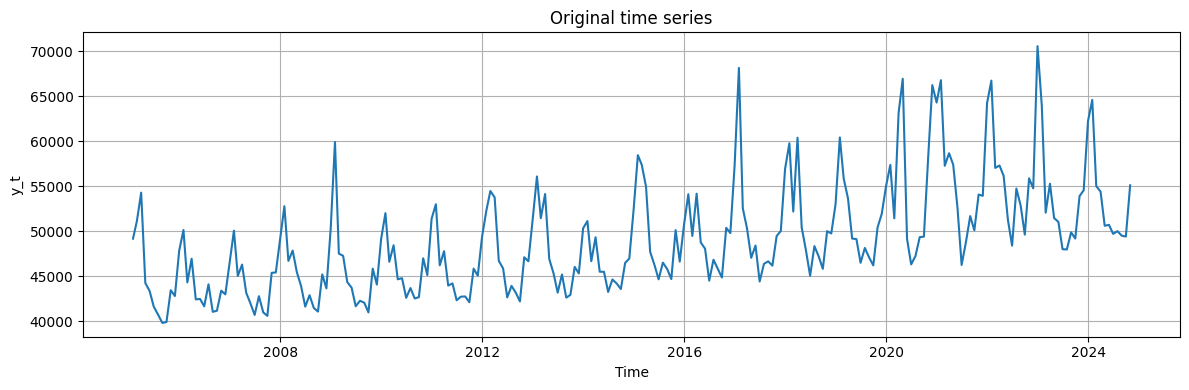

In [45]:
from data import get_france_death_rate_20y
import pandas as pd

data = get_france_death_rate_20y()

data["time"] = pd.to_datetime(data["time"])

fig, axes = get_figure()
ax = axes[0]  

time_plot(
    x=data['time'],
    y=data['value'],
    title="Original time series",
    xlabel="Time",
    ylabel="y_t",
    ax=ax,
)
fig.tight_layout()


In [46]:
stationarity_tests(y)


Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.0621)
	- ZA: Stationary (p-value: 0.0000)


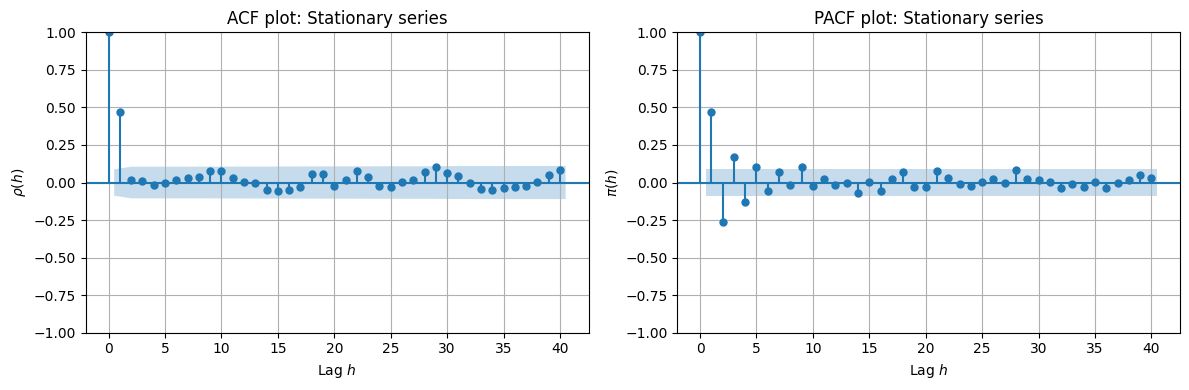

In [49]:
series_for_id = y

fig, axs = get_figure(ncols=2)

acf_plot(series_for_id, 40, axs[0], title="Stationary series")
pacf_plot(series_for_id, 40, axs[1], title="Stationary series")

fig.tight_layout()


In [50]:
model = ARIMA(
    y,
    order=(1, 1, 1)   
)

model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -733.815
Date:                Sat, 06 Dec 2025   AIC                           1473.630
Time:                        20:35:46   BIC                           1486.268
Sample:                             0   HQIC                          1478.590
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4707      0.042     11.222      0.000       0.388       0.553
ma.L1         -0.9945      0.007   -140.969      0.000      -1.008      -0.981
sigma2         1.1010      0.073     15.105      0.0

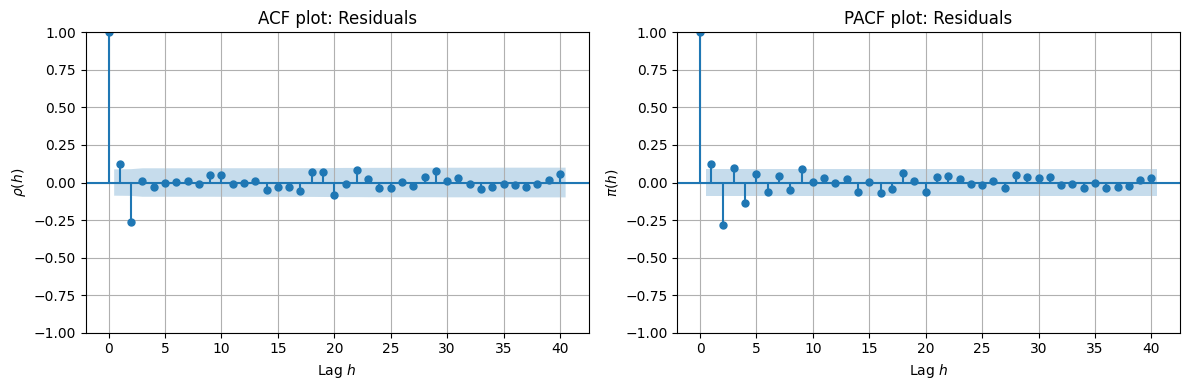

In [51]:
resid = model_fit.resid

fig, axs = get_figure(ncols=2)

acf_plot(resid, 40, axs[0], title="Residuals")
pacf_plot(resid, 40, axs[1], title="Residuals")

fig.tight_layout()
